In [2]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('data/patient_dataframe.csv')
df.head()

,patientID,numVisits,numProcedures,numContacts,cumulativeVisitDuration,Age,Gender,Diagnosis,Diagnosis.1,PhysicalAppointments,HomeAppointments,VirtualAppointments,numAcute,numPlanned,numRegularOutpatient,numAcuteAmbulatory,numUnderObservation
0,Z4115614,6,6,6,342.0,0.0,1.0,"{'DQ549', 'DZ001', 'DQ540'}","{'DQ549', 'DZ001', 'DQ540'}",5,0,1,0,6,6,0,0
1,Z4119225,6,3,6,260.0,0.0,1.0,{'DZ001'},{'DZ001'},6,0,0,0,6,6,0,0
2,Z4127033,17,11,17,1547.0,0.0,1.0,"{'DZ135C', 'DZ001', 'DQ753', 'DZ033A', 'DK628'...","{'DZ135C', 'DZ001', 'DQ753', 'DZ033A', 'DK628'...",14,1,2,0,17,17,0,0
3,Z4139519,3,3,3,120.0,0.0,1.0,{'DZ001'},{'DZ001'},3,0,0,0,3,3,0,0
4,Z4146746,4,3,4,180.0,0.0,1.0,{'DZ001'},{'DZ001'},3,1,0,0,4,4,0,0


In [4]:
# drop not numerical columns
df_drop = df.drop(['patientID', 'Diagnosis', 'Diagnosis.1'], axis=1)
df_drop.head()

,numVisits,numProcedures,numContacts,cumulativeVisitDuration,Age,Gender,PhysicalAppointments,HomeAppointments,VirtualAppointments,numAcute,numPlanned,numRegularOutpatient,numAcuteAmbulatory,numUnderObservation
0,6,6,6,342.0,0.0,1.0,5,0,1,0,6,6,0,0
1,6,3,6,260.0,0.0,1.0,6,0,0,0,6,6,0,0
2,17,11,17,1547.0,0.0,1.0,14,1,2,0,17,17,0,0
3,3,3,3,120.0,0.0,1.0,3,0,0,0,3,3,0,0
4,4,3,4,180.0,0.0,1.0,3,1,0,0,4,4,0,0


In [5]:
# standardize the data
scaler = sk.preprocessing.StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_drop), columns=df_drop.columns)
df_scaled


,numVisits,numProcedures,numContacts,cumulativeVisitDuration,Age,Gender,PhysicalAppointments,HomeAppointments,VirtualAppointments,numAcute,numPlanned,numRegularOutpatient,numAcuteAmbulatory,numUnderObservation
0,0.065295,0.154826,0.026830,-0.039000,-1.938148,1.073732,0.114552,-0.049641,-0.061644,-0.224827,0.082903,0.086233,-0.008172,-0.304745
1,0.065295,-0.480137,0.026830,-0.156793,-1.938148,1.073732,0.277126,-0.049641,-0.392437,-0.224827,0.082903,0.086233,-0.008172,-0.304745
2,1.472026,1.213096,1.372458,1.691989,-1.938148,1.073732,1.577722,6.411368,0.269149,-0.224827,1.512636,1.508617,-0.008172,-0.304745
3,-0.318359,-0.480137,-0.340159,-0.357904,-1.938148,1.073732,-0.210597,-0.049641,-0.392437,-0.224827,-0.307025,-0.301691,-0.008172,-0.304745
4,-0.190475,-0.480137,-0.217829,-0.271714,-1.938148,1.073732,-0.210597,6.411368,-0.392437,-0.224827,-0.177049,-0.172383,-0.008172,-0.304745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331757,0.193179,0.154826,0.149160,0.389079,-0.377078,-0.931331,0.439701,-0.049641,-0.392437,-0.224827,0.212878,0.215540,-0.008172,-0.304745
331758,-0.062590,-0.056828,-0.095500,-0.116571,-0.809636,-0.931331,0.114552,-0.049641,-0.392437,-0.224827,-0.047073,-0.043075,-0.008172,-0.304745
331759,-0.446244,-0.268483,-0.462489,-0.389507,-0.944740,-0.931331,-0.373172,-0.049641,-0.392437,-0.224827,-0.437001,-0.430998,-0.008172,-0.304745
331760,-0.574129,-0.903445,-0.584819,-0.434039,-0.706322,-0.931331,-0.535746,-0.049641,-0.392437,-0.224827,-0.566976,-0.560306,-0.008172,-0.304745


In [6]:
# pca
pca = sk.decomposition.PCA(n_components=10)
pca.fit(df_scaled)

PCA(n_components=10)

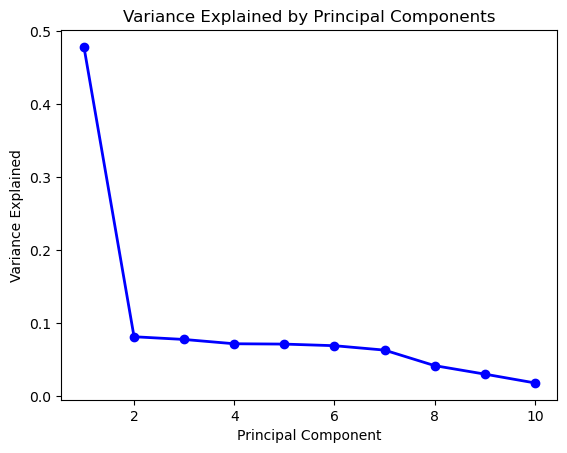

In [7]:
pc_values = np.arange(pca.n_components_) + 1
plt.plot(pc_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Variance Explained by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

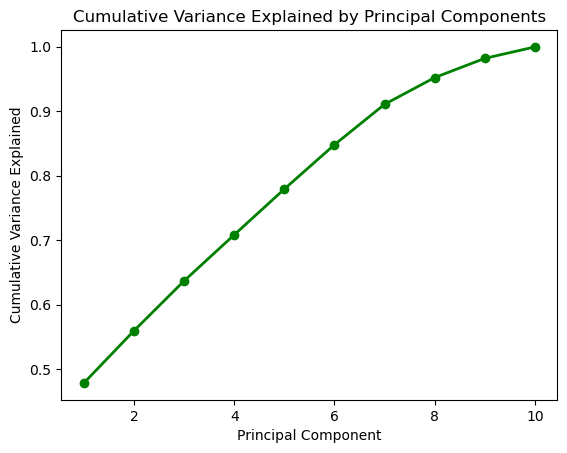

In [8]:
cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)
plt.plot(pc_values, cumulative_variance_explained, 'o-', linewidth=2, color='green')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Explained')
plt.show()


In [9]:
var_explained_7 = np.cumsum(pca.explained_variance_ratio_[0:7])
print(f'First 7 components explain {var_explained_7[-1]:.2f} of the variance')

First 7 components explain 0.91 of the variance


In [10]:
# pca for 7 components
pca = sk.decomposition.PCA(n_components=7)
principal_components = pca.fit_transform(df_scaled)

In [22]:
# pca components
pca_components = pca.components_
pca_components_df = pd.DataFrame(pca_components, columns=df_drop.columns, index=[f'PC{i+1}' for i in range(pca.n_components)])
pca_components_df

,numVisits,numProcedures,numContacts,cumulativeVisitDuration,Age,Gender,PhysicalAppointments,HomeAppointments,VirtualAppointments,numAcute,numPlanned,numRegularOutpatient,numAcuteAmbulatory,numUnderObservation
PC1,0.382487,0.291072,0.383574,0.333026,0.010188,-0.033454,0.354729,0.024894,0.266312,0.115432,0.380249,0.380138,0.000032,0.099641
PC2,-0.000720,-0.054840,0.029260,0.058631,0.542585,0.373218,-0.021290,-0.101988,0.046679,-0.536143,0.038712,-0.034108,-0.040316,0.504221
PC3,-0.056615,0.200041,-0.006675,-0.049093,0.364019,-0.443258,0.125008,-0.192111,-0.390964,0.443527,-0.090171,-0.086954,0.089937,0.446602
PC4,-0.000121,-0.003675,0.002463,0.002334,0.016837,0.137451,-0.006969,0.181745,0.004562,0.009287,-0.000806,-0.001439,0.973447,0.003046
PC5,-0.017806,0.068423,-0.009706,-0.029238,0.176219,-0.012221,-0.001080,0.952493,-0.092626,0.070927,-0.023315,-0.023979,-0.179401,0.093228
PC6,-0.029546,0.122211,0.020143,0.006156,-0.449330,0.666614,0.101171,-0.022415,-0.281130,0.321391,-0.053673,-0.053824,-0.084061,0.362724
PC7,0.028403,0.047288,-0.023854,-0.090658,0.577408,0.445017,0.063049,-0.098256,-0.049787,0.393656,-0.000094,0.063768,-0.055345,-0.527756


In [21]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

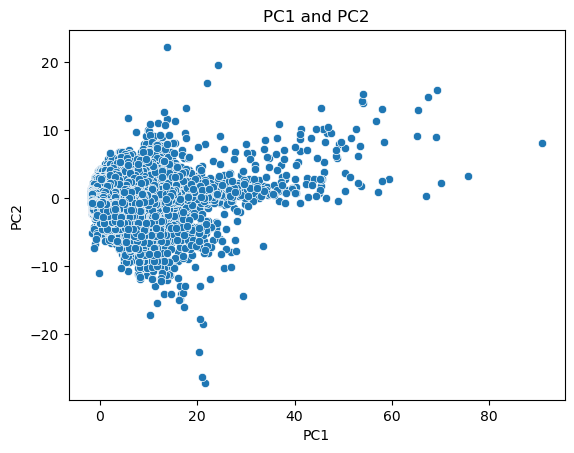

In [12]:
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PC1 and PC2')
plt.show()

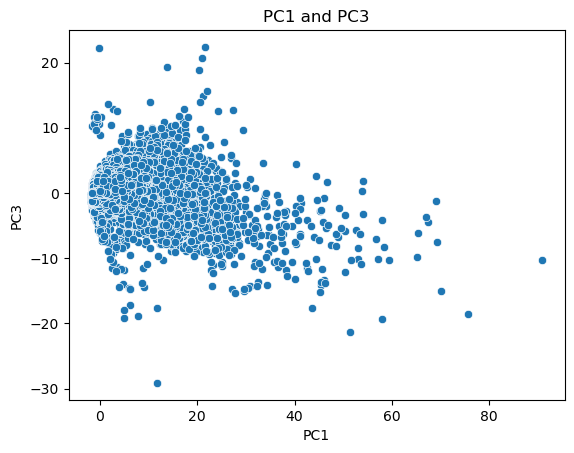

In [17]:
sns.scatterplot(x='PC1', y='PC3', data=pca_df)
plt.title('PC1 and PC3')
plt.show()

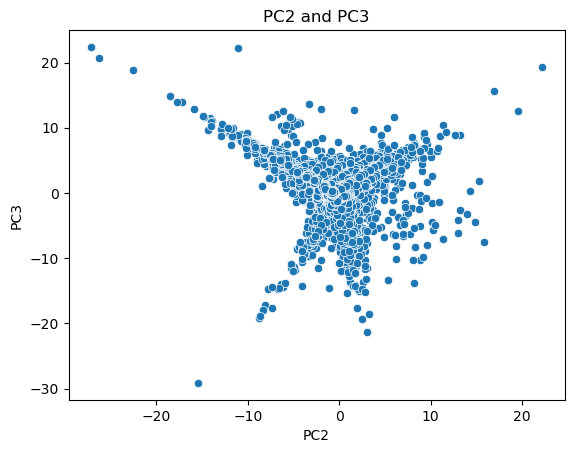

In [16]:
sns.scatterplot(x='PC2', y='PC3', data=pca_df)
plt.title('PC2 and PC3')
plt.show()

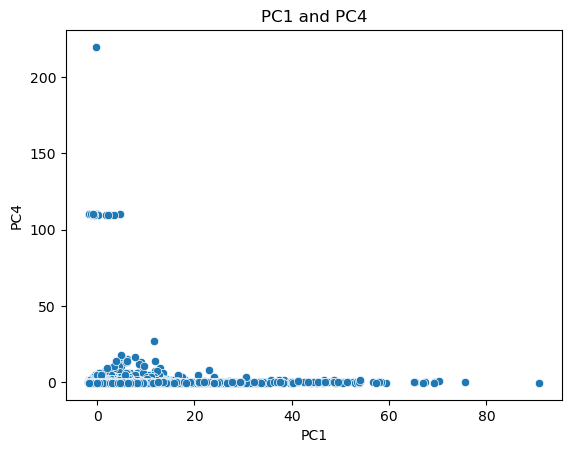

In [18]:
sns.scatterplot(x='PC1', y='PC4', data=pca_df)
plt.title('PC1 and PC4')
plt.show()